In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
propellers = pd.read_csv('data/all_info_test_data.csv')
propellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49576 entries, 0 to 49575
Data columns (total 51 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   name                                           49576 non-null  object 
 1   product_id                                     49576 non-null  object 
 2   Old_Serial                                     1185 non-null   object 
 3   New_Serial                                     842 non-null    object 
 4   Hub_Serial                                     1276 non-null   object 
 5   Status                                         49575 non-null  object 
 6   Do Not Import                                  49411 non-null  object 
 7   Hub Model                                      49576 non-null  object 
 8   Blade Count                                    49411 non-null  float64
 9   Blade Model                                    495

/home/chuck/.cache/pypoetry/virtualenvs/wrap-project-50V7Vr4D-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,13,16,19,20,23,31,33,40,41,42,43,47,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
# Number of Propellers per Blade Count
propellers['Blade Count'].value_counts()


3.0     33130
2.0      7622
4.0      3306
6.0      2260
5.0      1782
8.0      1093
10.0      150
12.0       43
7.0        14
9.0         9
1.0         2
Name: Blade Count, dtype: int64

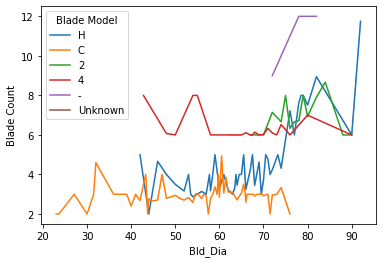

In [29]:
daily = sns.lineplot(x="Bld_Dia", y="Blade Count", hue="Blade Model", data=propellers, ci=0)

In [30]:
propellers['Blade Model'].value_counts()

C          39643
H           7378
2           1361
4           1022
Unknown      165
-              7
Name: Blade Model, dtype: int64

In [35]:
propellers['Bld_Dia'].value_counts().head(35)

68.0    15870
72.0     7776
70.0     6443
66.0     4132
60.0     3908
62.0     2545
64.0     2430
80.0     2098
58.0      562
54.0      496
63.0      411
67.0      400
52.0      400
71.0      361
56.0      244
74.0      168
48.0      156
69.0      145
50.0      128
65.0      107
78.0       75
73.0       71
59.0       69
82.0       44
46.0       40
76.0       34
57.0       29
42.0       28
90.0       28
55.0       25
61.0       18
44.0       18
60.5       14
36.0       11
77.0       10
Name: Bld_Dia, dtype: int64

### Declare Variables

In [42]:
engine = 'R532'
vehicle = 'Tierra II'
red_ratio = '2.58:1 Gear_Rotax B'

In [43]:
filtered_df = (propellers['Engine_ID'] == 'R532') & (propellers['Vehicle_ID'] == 'Tierra II') & (propellers['Reduction_Ratio (Rename to Red... Drive Name)'] == '2.58:1 Gear_Rotax B')

In [44]:
results = propellers.loc[filtered_df]

In [45]:
results['Blade Count'].value_counts()

3.0    67
2.0    11
Name: Blade Count, dtype: int64

In [47]:
results.describe()

,Blade Count,Bld_Dia,Customer_ID
count,78.000000,78.000000,78.000000
mean,2.858974,67.384615,7175.333333
std,0.350301,1.522394,4575.971774
min,2.000000,64.000000,367.000000
25%,3.000000,66.000000,3914.000000
50%,3.000000,68.000000,6072.000000
75%,3.000000,68.000000,10272.250000
max,3.000000,72.000000,18967.000000
